# Jackon Network Examples 1

The first set of Jackson Network models for INSY 7400

11/08/2019 - Jeff Smith

In [ ]:
# Import the mmc package
import mmc

## Example 1
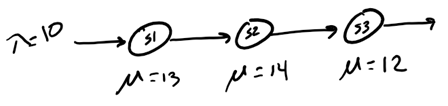

In [ ]:
# lambda - arrival rate
l = 10
# station service rates (mu) and capacities (c)
mus = [13, 14, 12]
cs  = [ 1,  1,  1]

# solve
sol = []
for i in range(len(mus)):
    sol.append(mmc.mmc(l, mus[i], cs[i]))
    if sol[i]['rho'] > 1.0:
        print ("System unstable (station {:})".format(i+1))
        exit()
    else:
        mmc.show(sol[i], "Station {:}".format(i+1))
# Sum the individual L's
L = sum([s['L'] for s in sol])
# Use Little's law for W
W = L/l 
print ("\nNIS: {:.3f}, TIS: {:.3f}".format(L, W*60))

## Example 2
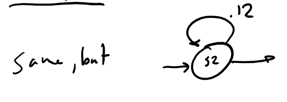

In [ ]:
# station arrival rates (lambda) service rates (mu) and capacities (c)
lambdas = [10, 10, 10]
# Update lambda[1] for the reentrancy
lambdas[1] = lambdas[0]/(1-.12)
mus = [13, 14, 12]
cs  = [ 1,  1,  1]

# solve
sol = []
for i in range(len(mus)):
    sol.append(mmc.mmc(lambdas[i], mus[i], cs[i]))
    if sol[i]['rho'] > 1.0:
        print ("System unstable (station {:})".format(i+1))
        exit()
    else:
        mmc.show(sol[i], "Station {:}".format(i+1))
L = sum([s['L'] for s in sol])
W = L/lambdas[0]
print ("\nNIS: {:.3f}, TIS: {:.3f}".format(L, W*60))

## Example 3
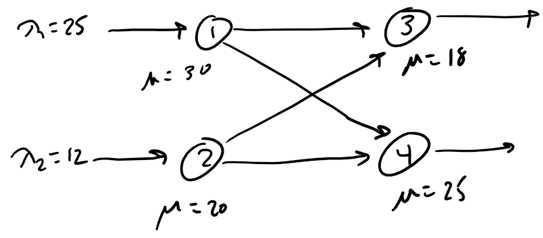

In [ ]:
# lambdas - arrival rates
l1 = 25
l2 = 12
# Station parameters
stations = [
    [l1, 30, 1], 
    [l2, 20, 1], 
    [l1*.25 + l2*.67, 18, 1], 
    [l1*.75 + l2*.33, 25, 1]
]

# solve
sol = []
for i in range(len(stations)):
    sol.append(mmc.mmc(stations[i][0], stations[i][1], stations[i][2]))
    if sol[i]['rho'] > 1.0:
        print ("System unstable (station {:})".format(i+1))
        exit()
    else:
        mmc.show(sol[i], "Station {:}".format(i+1))
# Sum the station L values
L = sum([s['L'] for s in sol])
# Little's law for TIS
W = L / (l1+l2)
print ("\nNIS: {:.3f}, TIS: {:.3f}".format(L, W*60))


## Example 4
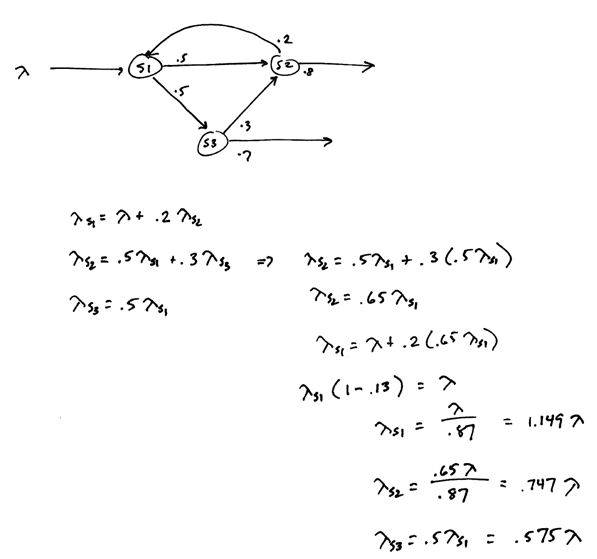

In [ ]:
# station arrival rates (lambda) service rates (mu) and capacities (c)
l = 10
lambdas = [l*1.149, l*0.747, l*0.575]
mus = [15, 10, 8]
cs  = [ 1,  1,  1]

# solve
sol = []
for i in range(len(mus)):
    sol.append(mmc.mmc(lambdas[i], mus[i], cs[i]))
    if sol[i]['rho'] > 1.0:
        print ("System unstable (station {:})".format(i+1))
        exit()
    else:
        mmc.show(sol[i], "Station {:}".format(i+1))
L = sum([s['L'] for s in sol])
W = L/l
print ("\nNIS: {:.3f}, TIS: {:.3f}".format(L, W*60))